# Packages

1. Import required packages!

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# visualisation
from plotnine import *
import seaborn as sns

# theme adaptation for x, y-labels
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Data Preparation

## Data Creation

2. Create classification data with "make_classification".

Parameters: n_samples=1000,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0

In [6]:
from sklearn.datasets import make_classification

In [63]:
x, y = make_classification(
    n_samples=1000,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0)

3. Visualise x and y

In [64]:
x_list = [j for i in x for j in i]
y_list = list(map(float, y))


df = pd.DataFrame(data=x_list, columns=['x'])
df['y'] = y_list

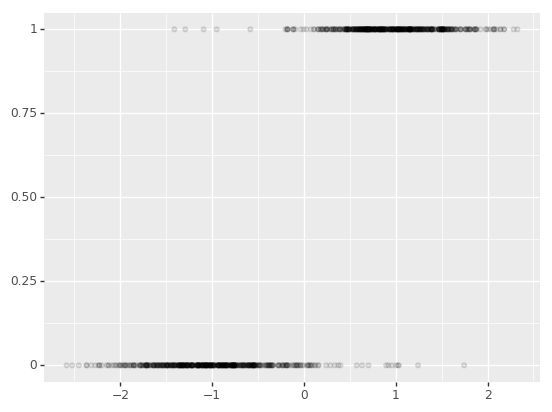

<ggplot: (140027933248)>

In [66]:
(ggplot(data=df) +
  aes(x, y) +
  geom_point(alpha=.1) + 
 labs(x="", y = "")
)

4. Create training, and testing data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

5. Create a Logistic Regression classifier and fit the model

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

6. Create predictions 

In [80]:
y_pred = logreg.predict(X_test)

# Model Evaluation

### Baseline Classifier

7. evaluate the baseline classifier

In [81]:
total = len(y_test)
np.max([sum(y_test) / total, 1 - sum(y_test) / total])

0.53

The baseline classifier reaches 53 % accuracy

### Logistic Regression Classifier

8. calculate the confusion matrix

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   4],
       [  1,  93]], dtype=int64)

9. calculate the accuracy

In [83]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.975

Our Classifier reaches 97.5 % accuracy.